#### IMPORT RELEVANT PACKAGES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

---

#### LOAD & TRANSFORM DATA

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")                    # Import Dataset
df_comp = raw_csv_data.copy()                                  # Create Dataset Copy

df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)   # Convert DATE Column to .to_datetime

df_comp.set_index("date", inplace = True)                      # Set DATE Column as INDEX

df_comp = df_comp.asfreq('b')                                  # Set FREQUENCY to Business Days - 'b'
df_comp = df_comp.fillna(method = 'ffill')                     # Fill NaN Values with FORWARD_FILL Methods - if any

In [3]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


---

#### REMOVE SURPLUS COLUMNS

In [4]:
df_comp['market_value'] = df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

---

#### WHITE NOISE

A special type of TIME-SERIES, where the data doesn't follow a pattern.

WHITE NOISE must satisfy 3 conditions: CONSTANT MEAN  |  CONSTANT VARIANCE  |  NO AUTOCORRELATION PERIOD

###### CREATE WHITE NOISE FROM OUR DATA

In [6]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [7]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [8]:
df['wn'] = wn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1096.744755
std,292.559287,290.657534
min,438.920000,-29.434805
25%,914.620000,907.444302
50%,1144.650000,1098.214712
75%,1316.280729,1286.894652
max,1570.252238,2224.616987


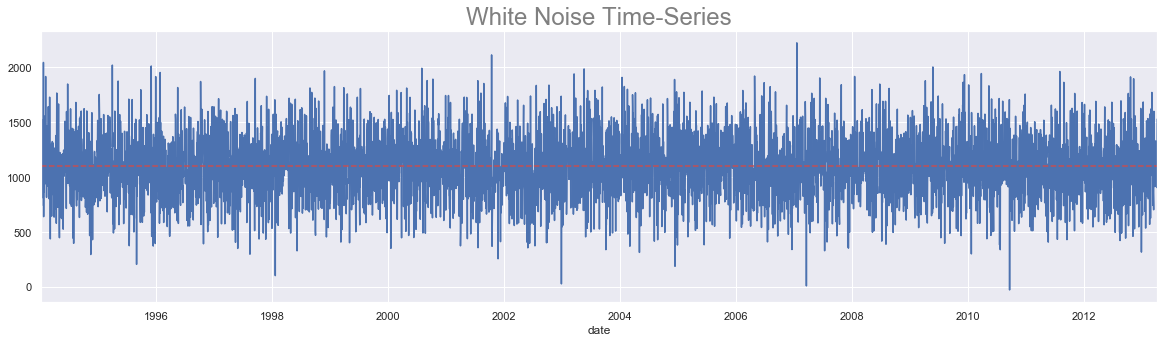

In [10]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24, color = 'grey')
plt.axhline(df.wn.mean(), color = 'r', alpha = 0.99, linestyle = '--')
plt.show()

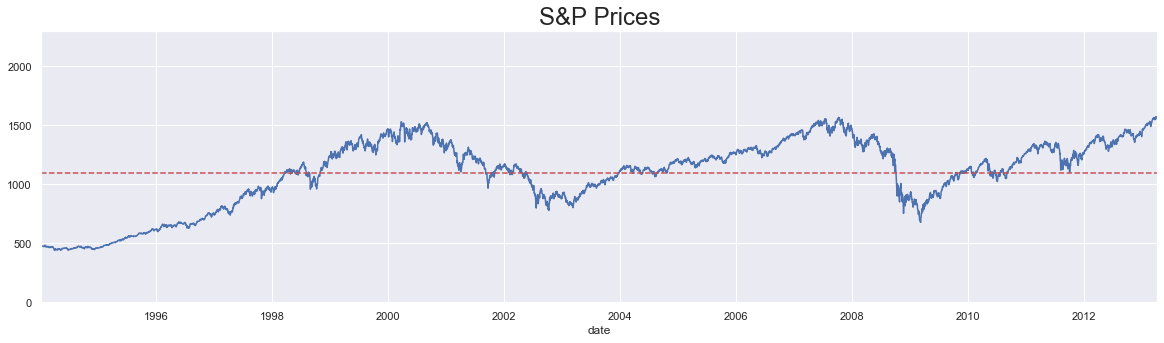

In [11]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.axhline(df.wn.mean(), color = 'r', alpha = 0.99, linestyle = '--')
plt.ylim(0,2300)
plt.show()

---

#### RANDOM WALK

How do you know if your...
#### TIME SERIES PROBLEM IS PREDICTABLE?

A TS where values tend to persist over time & differences between periods are simply WHITE NOISE.

A tool called a RANDOM WALK can help you understand the predictability of your time series forecast problem.

All RANDOM WALK TS are Non-Stationary.
But not all Non-Stationary time series are RANDOM WALK.

In [12]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [13]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [14]:
df['rw'] = rw.price

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1015.991916,1122.139662
1994-01-10,475.27,739.087880,1080.347860
1994-01-11,474.13,1074.313681,1082.095245
1994-01-12,474.17,811.252516,1083.639265
1994-01-13,472.47,1035.416270,1067.146255


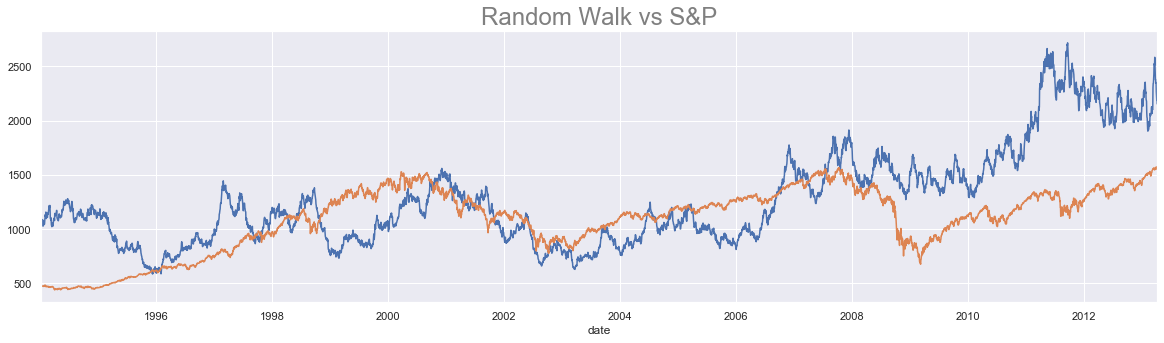

In [16]:
df.rw.plot(figsize = (20,5))
#plt.axhline(df.rw.mean(), color = 'r', alpha = 0.99, linestyle = '--')
df.market_value.plot()
#plt.axhline(df.market_value.mean(), color = 'g', alpha = 0.99, linestyle = '--')
plt.title("Random Walk vs S&P", size = 24, color = 'grey')
plt.show()

#### MARKET EFFICIENCY

In finance this is a term used when measuring the level of difficulty in forecasting correct future values.

If a TIME-SERIES resembles a RANDOM WALK the prices can't be predicted with accuracy.

Then there are ARBITRAGE oppurtunities. Investors Buy & sell commodities and make a safe profit, while the price adjusts

---

#### PERFORM ADFULLER TEST TO CHECK STATIONARITY

In [17]:
import statsmodels.tsa.stattools as sts

In [18]:
sts.adfuller(df.market_value)

(-1.7369847452352463,
 0.4121645696770607,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [19]:
sts.adfuller(df.wn)

(-72.41255223956612,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70733.17030624264)

In [20]:
sts.adfuller(df.rw)

(-1.3286073927689712,
 0.6159849181617387,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

---

#### CHECK SEASONALITY

In [39]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
#plt.rcParams

#### ADDITIVE DECOMPOSITION

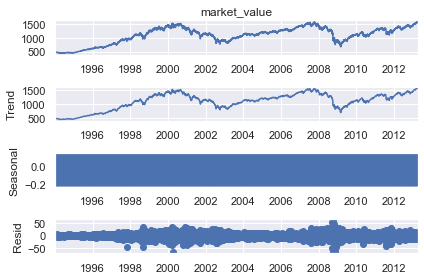

In [21]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
#plt.title("SEASONAL_DECOMPOSITION__ADDITIVE", size = 24, color = 'grey')
plt.show()

#### MULTIPLICATIVE DECOMPOSITION

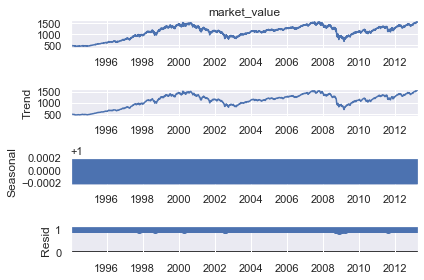

In [22]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

---

#### ACF

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams

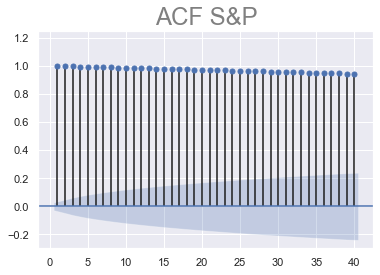

In [23]:
sgt.plot_acf(df.market_value, lags = 40, zero = False, auto_ylims = True)
plt.title("ACF S&P", size = 24, color = 'grey')
plt.show()

In [55]:
import matplotlib.pyplot as plt

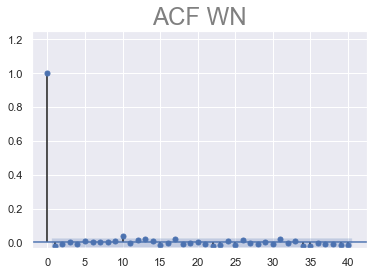

In [26]:
sgt.plot_acf(df.wn, lags = 40, auto_ylims = True, zero = True)
plt.title("ACF WN", size = 24, color = 'grey')
plt.show()

### PACF

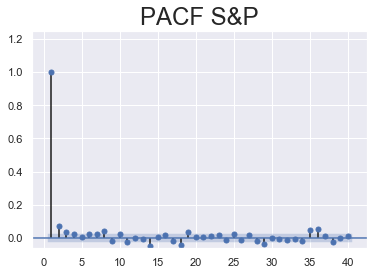

In [29]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, auto_ylims = True, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

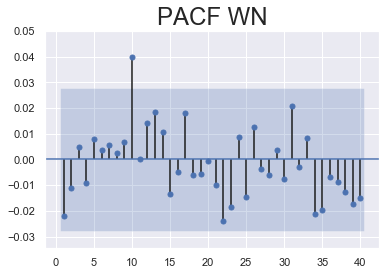

In [30]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, auto_ylims = True, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()